#  Adult income analysis 




In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Data

This is an analysis of the Adult data set in the UCI Machine Learning Repository.

 This data was extracted from the census bureau database found at
 http://www.census.gov/ftp/pub/DES/www/welcome.html
 Donor: Ronny Kohavi and Barry Becker,
       Data Mining and Visualization
       Silicon Graphics.
       e-mail: ronnyk@sgi.com for questions.
       
The columns represent the age, workclass, final weight, education, education number, marital status, occupation, relationship, race, sex, capital-gain is an ordinal number, capital-loss is another ordinal attribute, hours-per-work put in, country and salary. 

Each row represents an example of the census data with all the background information of the person/ people.

This data set is meant for binary class classification - to predict whether the income of a person exceeds 50K per year based on some census data.

The other information that this data contains includes the workclass that the employee belongs to, their highest level of education, their marital status, their occupation, their gender, race and country of origin.

All of these could be contributing factors to the general income of a person and can be used as features to give an approximation of whether or not a person's income exceeds 50K while performing further analysis.

It is likely that people with a higher level of education earns more people who haven't completed high school on an average. Similarly, some professions definitely pay better than others and there is a correlation between the gender or race of a person and their income as well, in general. 

Basic statistics and visualization tools can be used to determine the correlation between all these factors and the salary of the person. 




In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv("/Users/shraddhasunil/Downloads/adult.data.txt",names = column_names)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Some of the questions I am interested in answering while performing this analysis are:

1. What are the attributes upon which salary of a person is most-commonly dependent? Is the salary been affected by their marital-status or relationship status?

2. How much do factors like sex and race seem to influence final pay?

3. What is the disparity caused by level of education obtained?

4. How much does a person's native background seem to influence their salaries ?

Understanding all of this is important in order to try and bridge the income gap that very much exists in our society today

# 2. Preliminary Analysis of Data

## Meanings of each attribute


Age : Ordinal attribute denoting age of the person - Range from 17 to 90

Workclass : Nominal attribute denoting the working class of a person with values - Private, Selfemp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

Fnlwgt : Ordinal attribute denoting the survey weight

Education : Nominal attribute denoting the education level of a person with values - Bachelors,
Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,
1st-4th, 10th, Doctorate, 5th-6th, Preschool.

Education-num : Ordinal attribute denoting the educational number given to each education level
Range from 1 to 16.

Marital-status : Nominal attribute denoting the marital status of a person with values - Marriedciv-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AFspouse.

Occupation : Nominal attribute denoting occupation level of a person with values - ech-support,
Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-opinspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, ArmedForces.

Relationship : Nominal attribute denoting the relationship status of a person with values - Wife,
Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race : Nominal attribute denoting race of a person with values - White, Asian-Pac-Islander, AmerIndian-Eskimo, Other, Black.

Sex : Nominal attribute having two values - male or female.

Capital-gain : Ordinal attribute denoting the capital gain contributed by the person - Range from
0 to 99999

Capital-loss : Ordinal attribute denoting the capital loss caused by the person - Range from 0 to
4356

Hours-per-week : Ordinal attribute denoting the total number of hours worked per week by the
person - Range from 1 to 99

Native-country : Nominal attribute denoting the country of origin of the person with values -
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVIetc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan,
Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,
Trinadad &Tobago, Peru, Hong, Holand-Netherlands.

Income : Nominal attribute having two values > 50k , < 50k

## Basic statistics for the attributes


The table below gives us the mean,median,standard deviation,min,max and lower and upper quartile ranges.


From the data below, it is understoood that the mean and median age of the employee in the adult dataset is 38 and 37 respectively while the lower quartile age is 28 and upper quartile age is 48. 
So about half of the employees are between 28 and 48 years of age. 

It is also found that the capital-gain and capital-loss range is between 0 to 99999 and 0 to 4356 respectively however the contributions towards this are only by a very small section of employees (less than 25%). 

The hours per week put in by most employees are around 40-45 (both mean and median are at 40) as is the lower quartile and the upper quartile is around 45.

The survey weight ranges from 12285 to 1.4847053+06



In [3]:
df.describe()



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
workclass = df['workclass'].unique()
education = df['education'].unique()
educational_num = df['educational-num'].unique()
relationship = df['relationship'].unique()
native_countries = df['native-country'].unique()
marital_status = df['marital-status'].unique()
race = df['race'].unique()
sex = df['sex'].unique()
capital_gain = df['capital-gain'].unique()
capital_loss = df['capital-loss'].unique()
hours_per_week = df['hours-per-week'].unique()
native_countries = df['native-country'].unique()
occupation = df['occupation'].unique()




## Dealing with missing data, duplicate data and outliers 


One of the ways of dealing with missing data such as that represented by '?' is to replace is with NaNs and drop those rows.
This makes sense in this dataset as the number of NaNs are very less compared to the size of the entire dataset. If this was not the case, it would have made more sense to replace the values with the median or mode values in the dataset depending on the distribution of data in the dataset.

Duplicate data can be dropped from the dataset. 

Outliers are also discarded from the dataset




In [5]:
duplicate_data = df.duplicated()
print(duplicate_data.sum())
df = df.drop_duplicates()

24


In [6]:
df['native-country'] = df['native-country'].replace(' ?',np.NaN)
df['workclass'] = df['workclass'].replace(' ?',np.NaN)
df['occupation'] = df['occupation'].replace(' ?',np.NaN)
for col in df.columns:
    print(col,df[col].isna().sum())
df.dropna(how='any',inplace=True)

age 0
workclass 1836
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 582
income 0


In [7]:
numdata = df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]


In [8]:


Z = (numdata-numdata.mean())/numdata.std()
Z[20:25]

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==6) & ((Z <= 3).sum(axis=1)==6),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 30139
Number of rows after discarding missing values = 27602


In [9]:
salary_map={' <=50K':0,' >50K':1}
df['income']=df['income'].map(salary_map).astype(int)


In [10]:
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

print (df.head(10))
#print (("-"*40))
#print (df.info())


   age          workclass  fnlwgt   education  educational-num  \
0   39          State-gov   77516   Bachelors               13   
1   50   Self-emp-not-inc   83311   Bachelors               13   
2   38            Private  215646     HS-grad                9   
3   53            Private  234721        11th                7   
4   28            Private  338409   Bachelors               13   
5   37            Private  284582     Masters               14   
6   49            Private  160187         9th                5   
7   52   Self-emp-not-inc  209642     HS-grad                9   
8   31            Private   45781     Masters               14   
9   42            Private  159449   Bachelors               13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cl

## Study of correlation of income and other attributes

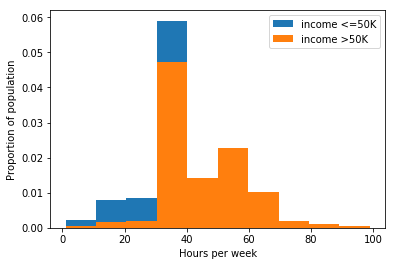

In [11]:

hours_when_income_less_than_50k = df.loc[df['income'] == 0, 'hours-per-week']
hours_when_income_greater_than_50k = df.loc[df['income'] == 1, 'hours-per-week']
plt.hist(hours_when_income_less_than_50k,bins=None,density=True,normed=None,histtype='bar',label='income <=50K')
plt.hist(hours_when_income_greater_than_50k,bins=None,density=True,normed=None,histtype='bar',label = 'income >50K')
plt.xlabel('Hours per week')
plt.ylabel('Proportion of population')


plt.legend()
plt.show()

 Histogram plot above shows the correlation between the number of hours worked per week and the total salary. The hours range from 1 to 99 with a mean and median of 40. Most of people who earn more than 50K seem to be working about 30-40 hours a week

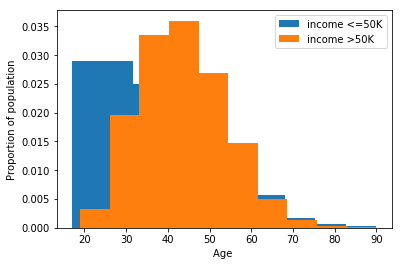

In [12]:

age_when_income_less_than_50k = df.loc[df['income'] == 0, 'age']
age_when_income_greater_than_50k = df.loc[df['income'] == 1, 'age']
plt.hist(age_when_income_less_than_50k,bins=None,density=True,normed=None,histtype='bar',label='income <=50K')
plt.hist(age_when_income_greater_than_50k,bins=None,density=True,normed=None,histtype='bar',label = 'income >50K')
plt.xlabel('Age ')
plt.ylabel('Proportion of population')


plt.legend()
plt.show()

 Histogram plot above shows the correlation between the age of the employee and the total salary. The age varies from 17 to 90. Most of people who earn more than 50K seem to be older which is not very surprising. Yonger people seem to be making less than 50K

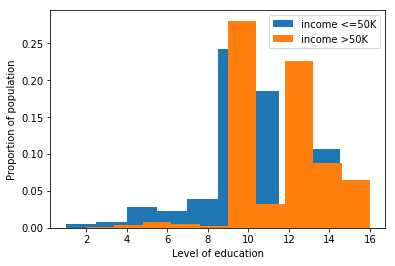

In [13]:

edu_when_income_less_than_50k = df.loc[df['income'] == 0, 'educational-num']
edu_when_income_greater_than_50k = df.loc[df['income'] == 1, 'educational-num']
plt.hist(edu_when_income_less_than_50k,bins=None,density=True,normed=None,histtype='bar',label='income <=50K')
plt.hist(edu_when_income_greater_than_50k,bins=None,density=True,normed=None,histtype='bar',label = 'income >50K')
plt.xlabel('Level of education')
plt.ylabel('Proportion of population')


plt.legend()
plt.show()

 Histogram plot above shows the correlation between the level of education of employees and the total salary. People who have finished higher levels of education seem to earn more on an average. However the percentage of people with higher levels of education seem low as does the percentage of people with very minimum education. Most people have finished a level of education of about 8-11 on a scale of 0 - 16.

In [14]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()


## Relationship among attributes

The correlation matrix below shows the relationship between different attributes. It shows that there are few correlations between various attributes of the data. 


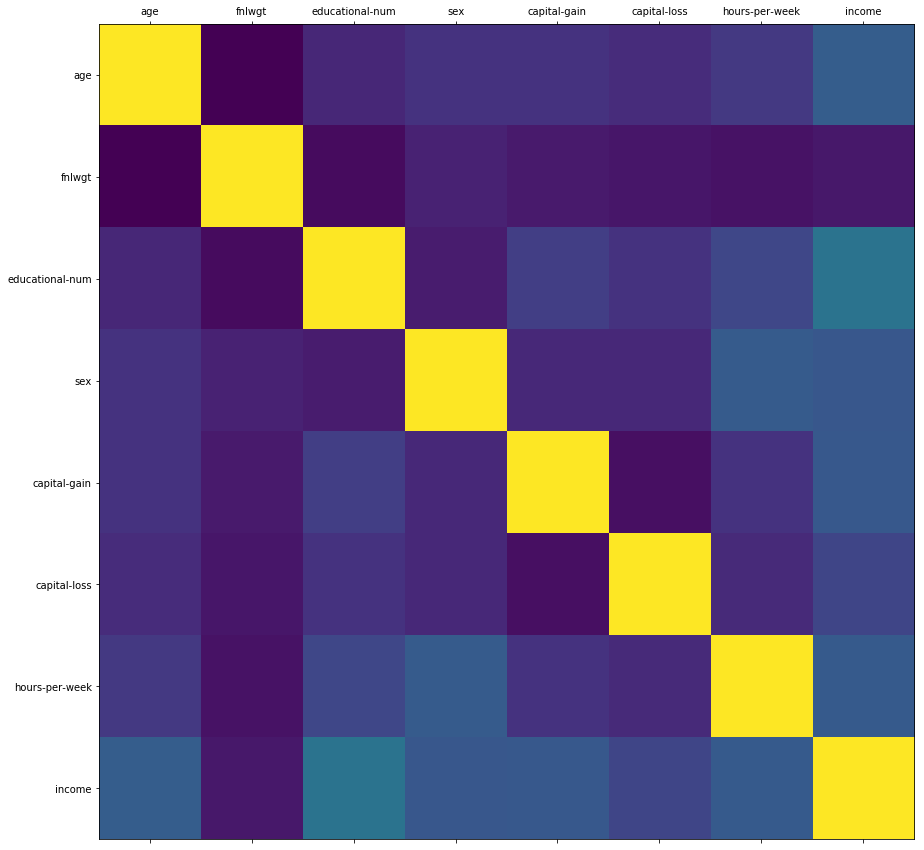

In [15]:
plot_correlation(df)


Text(0,0.5,'Hours per week')

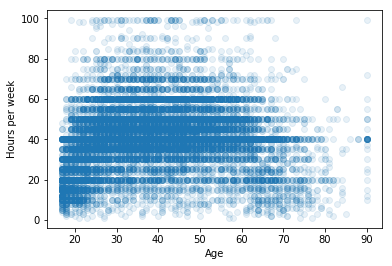

In [16]:
plt.scatter(df['age'],df['hours-per-week'],alpha = 0.1)
plt.xlabel('Age')
plt.ylabel('Hours per week')

From the scatterplot above,  of all ages appear to work for about 40 hours per week but younger people seem to be working for fewer hours a week as well. 

## Average income based on different attributes


In [17]:
print (df[['native-country','income']].groupby(['native-country']).mean())


                               income
native-country                       
 Cambodia                    0.388889
 Canada                      0.336449
 China                       0.294118
 Columbia                    0.035714
 Cuba                        0.271739
 Dominican-Republic          0.029851
 Ecuador                     0.148148
 El-Salvador                 0.090000
 England                     0.348837
 France                      0.444444
 Germany                     0.343750
 Greece                      0.275862
 Guatemala                   0.049180
 Haiti                       0.095238
 Holand-Netherlands          0.000000
 Honduras                    0.083333
 Hong                        0.315789
 Hungary                     0.230769
 India                       0.400000
 Iran                        0.428571
 Ireland                     0.208333
 Italy                       0.352941
 Jamaica                     0.125000
 Japan                       0.389831
 Laos       

This is a comparison of income by native country. It is found that the mean income in employees where the person's native country is Taiwan, France, Iran or India are much higher than the mean income where the employee is originally from Mexico or Nicaragua.

Native country is clearly a very good indicator of income.



### The following tables show the relationship between income and different attributes. 

1. It is found that income appears to be higher for people who are married as opposed to single people or people who are divorced, widowed or separated. 

2. It is also found that Asians and White people earn a lot more than Blacks and Native americans. There appears to be a very high correlation between race and income. 

3. Also, there is a very high correlation between occupation and income. Executive and professional jobs pay a lot more than jobs like clerical work and cleaning.

4. Similarly people with higher degrees earn a lot more than high school dropouts.

In [18]:
df[['relationship','income']].groupby(['relationship']).mean()


,income
relationship,
Husband,0.455728
Not-in-family,0.106689
Other-relative,0.039370
Own-child,0.014343
Unmarried,0.066334
Wife,0.493599


In [19]:
df[['marital-status','income']].groupby(['marital-status']).mean()


,income
marital-status,
Divorced,0.107312
Married-AF-spouse,0.476190
Married-civ-spouse,0.455011
Married-spouse-absent,0.083784
Never-married,0.048399
Separated,0.070288
Widowed,0.096735


In [20]:
df[['race','income']].groupby('race').mean()


,income
race,
Amer-Indian-Eskimo,0.118881
Asian-Pac-Islander,0.277405
Black,0.129972
Other,0.090909
White,0.263855


In [21]:
df[['marital-status','income']].groupby(['marital-status']).mean()


,income
marital-status,
Divorced,0.107312
Married-AF-spouse,0.476190
Married-civ-spouse,0.455011
Married-spouse-absent,0.083784
Never-married,0.048399
Separated,0.070288
Widowed,0.096735


In [22]:
df[['workclass','income']].groupby(['workclass']).mean()

,income
workclass,
Federal-gov,0.387063
Local-gov,0.294630
Private,0.218918
Self-emp-inc,0.558659
Self-emp-not-inc,0.285829
State-gov,0.268960
Without-pay,0.000000


In [23]:
df[['occupation','income']].groupby(['occupation']).mean()


,income
occupation,
Adm-clerical,0.133907
Armed-Forces,0.111111
Craft-repair,0.225590
Exec-managerial,0.485342
Farming-fishing,0.116515
Handlers-cleaners,0.061527
Machine-op-inspct,0.124236
Other-service,0.041134
Priv-house-serv,0.007092


In [24]:
df[['education','income']].groupby(['education']).mean()

,income
education,
10th,0.071951
11th,0.056298
12th,0.076923
1st-4th,0.040268
5th-6th,0.041812
7th-8th,0.062950
9th,0.054945
Assoc-acdm,0.253968
Assoc-voc,0.263198


# Data processing phase



I shall now proceed to convert all the columns that contain textual data into ordinal attributes so that it is easier to perform any type of statistical analysis in the future. 

Transforming attributes into ordinal values ....

In [25]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,3,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,0,1,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,0,0,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,1,5178,0,40,United-States,1


In [26]:

df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,0,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,0,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,0,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,3,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,3,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,0,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,3,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,0,1,0,0,45,United-States,1
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,0,0,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,0,1,5178,0,40,United-States,1


In [27]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)
    
df.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,United-States,1
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,United-States,1


In [28]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,United-States,0,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,United-States,0,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,United-States,0,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,United-States,0,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,Cuba,0,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,United-States,0,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,Jamaica,0,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,United-States,1,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,United-States,1,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,United-States,1,private


In [29]:
df[['employment_type','income']].groupby(['employment_type']).mean()


,income
employment_type,
govt,0.307298
private,0.218918
self_employed,0.367861
without_pay,0.000000


In [30]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,United-States,0,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,United-States,0,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,Cuba,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,United-States,0,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,Jamaica,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,United-States,1,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,United-States,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,United-States,1,1


In [31]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,educational-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,employment_type
0,39,77516,13,1,3,0,1,2174,0,40,United-States,0,0
1,50,83311,13,0,2,0,1,0,0,13,United-States,0,2
2,38,215646,9,1,3,0,1,0,0,40,United-States,0,1
3,53,234721,7,0,2,3,1,0,0,40,United-States,0,1
4,28,338409,13,0,1,3,0,0,0,40,Cuba,0,1
5,37,284582,14,0,1,0,0,0,0,40,United-States,0,1
6,49,160187,5,1,3,3,0,0,0,16,Jamaica,0,1
7,52,209642,9,0,2,0,1,0,0,45,United-States,1,2
8,31,45781,14,1,3,0,0,14084,0,50,United-States,1,1
9,42,159449,13,0,2,0,1,5178,0,40,United-States,1,1


In [32]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0


In [33]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0



In [34]:

#df[df['income'] == 0]['marital-status'].hist(bins = 10)
#df[df['income'] == 1]['marital-status'].hist(bins = 10)
df.head()

,age,fnlwgt,educational-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,employment_type
0,39,77516,13,1,3,0,1,1,0,40,United-States,0,0
1,50,83311,13,0,2,0,1,0,0,13,United-States,0,2
2,38,215646,9,1,3,0,1,0,0,40,United-States,0,1
3,53,234721,7,0,2,3,1,0,0,40,United-States,0,1
4,28,338409,13,0,1,3,0,0,0,40,Cuba,0,1


In the above cells, I have mapped the values of various attributes to ordinal values to make it easier for analysis in the future. 

In doing so, it can be used in various ML models for further analysis and textual data is not understood by these models. 

I have also created a new column called country in which I have separated the rows where the native employees belong to US and the ones that do not. 

I did this as there appears to be a fairly high correlation betweeen income and the native country a person belongs to and I feel like it might be useful to conduct analysis on the two sets of data separately. It also gives useful information about how natives of USA perform vs people who were originally immigrants. This can potentially provide interesting information. 



In [35]:
df = df.drop(['relationship'], axis=1)

In [36]:

df.loc[df['native-country'] != ' United-States', 'country'] = 'Non-US'
df.loc[df['native-country'] == ' United-States', 'country'] = 'US'
df.head()

,age,fnlwgt,educational-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,employment_type,country
0,39,77516,13,1,0,1,1,0,40,United-States,0,0,US
1,50,83311,13,0,0,1,0,0,13,United-States,0,2,US
2,38,215646,9,1,0,1,0,0,40,United-States,0,1,US
3,53,234721,7,0,3,1,0,0,40,United-States,0,1,US
4,28,338409,13,0,3,0,0,0,40,Cuba,0,1,Non-US


I have dropped the column 'relationship' as it seems like that attribute doesnt seem to influence the final income by too much of a factor. It is found that employees with husbands or wives seem to earn more than other employees. However, this information already appears to be captured in the 'marital-status' attribute.

I have decided to keep the remaining attributes as they seem to have some sort of correlation with the final income. They can provide useful information while trying to classify the data in the next stages.

The data cleaning that has been done above includes removing duplicates, outliers and missing data. It also includes performing transformations to ordinal values and removing and adding columns. 